# Name: Tayyab Aslam
# Roll NO: 23
# Subject: ANN
# Class: BS AI 7th

# Handwritten Digit Recognition Using ANN

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split validation data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# ANN Model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {test_acc * 100:.2f}%')


Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2524 - accuracy: 0.9262 - val_loss: 0.1286 - val_accuracy: 0.9605
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1058 - accuracy: 0.9678 - val_loss: 0.1031 - val_accuracy: 0.9698
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0743 - accuracy: 0.9766 - val_loss: 0.0871 - val_accuracy: 0.9737
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.0808 - val_accuracy: 0.9743
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.0782 - val_accuracy: 0.9762
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0347 - accuracy: 0.9880 - val_loss: 0.0894 - val_accuracy: 0.9735
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0295 - accuracy: 0.9899 - val_loss: 0.0777 - val_accuracy:

# Prediction on New Data

1/1 [==============================] - 0s 40ms/step


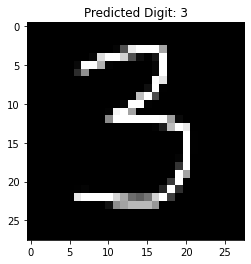

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a new image (replace 'digit.png' with your actual image)
image = cv2.imread('3 hand.png', cv2.IMREAD_GRAYSCALE)

# Resize to 28x28 pixels
image = cv2.resize(image, (28, 28))

# Invert colors if the background is black
image = 255 - image  

# Normalize (convert pixel values to 0-1 range)
image = image / 255.0

# Reshape image based on model input
image = image.reshape(1, 28,28)

# Make prediction
prediction = model.predict(image)

# Get the digit with highest probability
predicted_digit = np.argmax(prediction)

# Display result
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted Digit: {predicted_digit}')
plt.show()
